## Clustering in Scikit-Learn

Clustering helps us find natural groupings in data without using labels. The most common clustering algorithm is k-means

**Preparing and Exploring the Data**

For a straightforward demo, we'll use Scikit-Learn’s built-in Iris dataset, which is commonly used for clustering tutorials. 

This plot helps you spot clusters visually

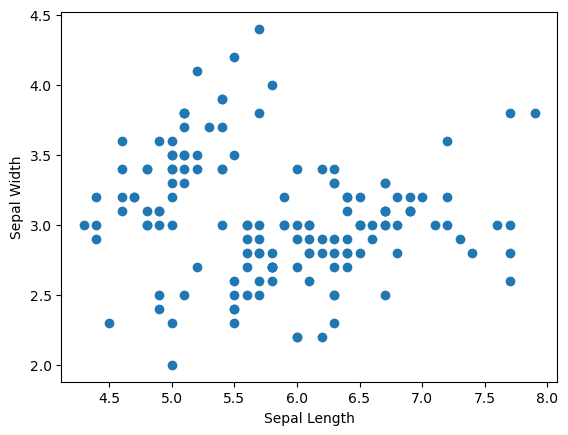

In [8]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

# Load Iris dataset (using only two features for simplicity)
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df[['sepal length (cm)', 'sepal width (cm)']]

# Scatter plot to visually inspect possible clusters
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

**Running K-Means Clustering (Random Initialization)**   

Let’s cluster the data using k-means. We’ll begin by choosing how many clusters (k) to find. With Iris dataset, let's use 3.

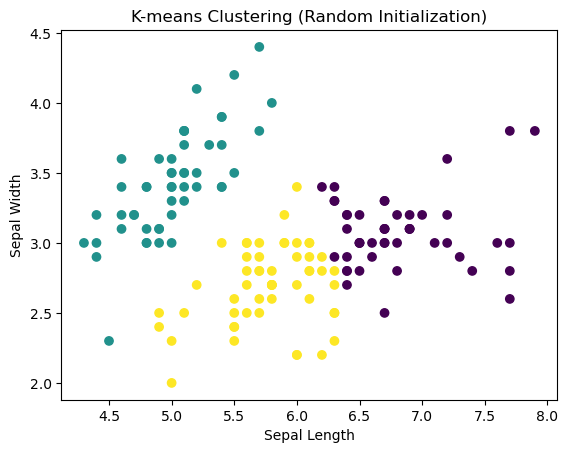

In [9]:
from sklearn.cluster import KMeans

kmeans_random = KMeans(n_clusters=3, init='random', n_init=10, random_state=42)
kmeans_random.fit(X)
labels_random = kmeans_random.labels_

# Plot clusters
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=labels_random)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering (Random Initialization)')
plt.show()


- init='random' selects centroids at random from your data.
- After fitting, .labels_ shows the cluster each point belongs to.
- Plot colors show which cluster each Iris sample is assigned to.​

Pitfall: Random initialization sometimes starts centroids too close together, resulting in less meaningful clusters.

**Improved Initialization: k-means++**

K-means++ selects initial centroids more intelligently, spreading them out to cover the data better. In Scikit-Learn, k-means++ is the default option. Let’s see how to run it explicitly:

Initialization complete
Iteration 0, inertia 62.35.
Iteration 1, inertia 44.154024436375764.
Iteration 2, inertia 39.37618568286982.
Iteration 3, inertia 38.32784328620928.
Iteration 4, inertia 37.81661784297052.
Iteration 5, inertia 37.35077406699919.
Iteration 6, inertia 37.06326071457923.
Iteration 7, inertia 37.05070212765958.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 46.690000000000005.
Iteration 1, inertia 38.50131616652985.
Iteration 2, inertia 38.11638987820429.
Iteration 3, inertia 37.99938379097737.
Iteration 4, inertia 37.877849604547706.
Iteration 5, inertia 37.80215170169887.
Iteration 6, inertia 37.713613748304034.
Iteration 7, inertia 37.65376088641074.
Iteration 8, inertia 37.43918503365092.
Iteration 9, inertia 37.32760861957952.
Iteration 10, inertia 37.25998479982724.
Iteration 11, inertia 37.14677171591314.
Iteration 12, inertia 37.10014582425563.
Iteration 13, inertia 37.08627024722933.
Converged at iteration 13: str

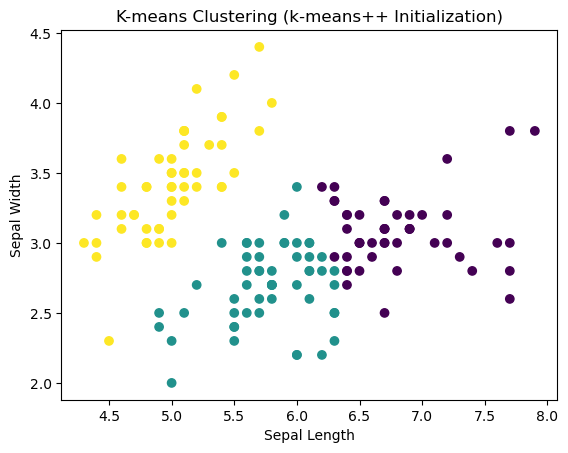

In [10]:
kmeans_pp = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42, verbose=1)
kmeans_pp.fit(X)
labels_pp = kmeans_pp.labels_

plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=labels_pp)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering (k-means++ Initialization)')
plt.show()


- k-means++ spreads the initial centroids, which usually improves clustering and lowers the inertia (sum of distances from points to their centroids).​

- Setting verbose=1 prints helpful details about iterations and inertia as clustering progresses—great for beginners!

**The Elbow Method: Choosing k**

How do you pick the right number of clusters? The elbow method is a popular approach. You plot the inertia for different k values and look for an 'elbow' point where gains diminish.

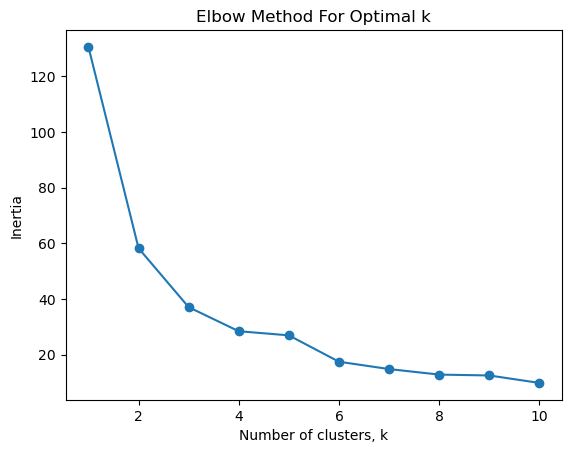

In [11]:
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Interpretation:

- The elbow marks where adding clusters stops drastically reducing inertia.​
- Choose k near that elbow to balance detail and simplicity.

**DBSCAN: Density-Based Clustering in Scikit-Learn**

K-means may struggle with odd-shaped clusters or noise. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a flexible alternative that finds clusters based on data density and marks outliers.

Key DBSCAN features:   
- Finds clusters and noise automatically (you don’t specify k).
- Points labeled -1 are flagged as outliers/noise.​



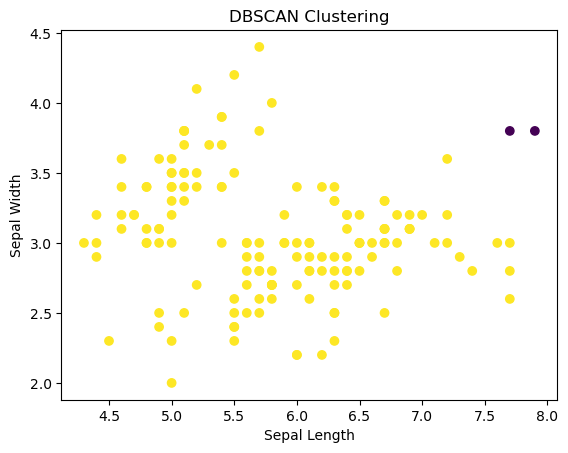

In [13]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
db_labels = dbscan.labels_

plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=db_labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering')
plt.show()

**Predicting New Cluster Membership (Only K-means)**

- Once fitted, K-means can predict the cluster for new data points—very useful for incoming customers:
- Only k-means has this .predict() method; (DBSCAN does not assign new points after training.)
- After fitting k-means, you can continually assign new shoppers to segments, helping target marketing strategies.

Cluster assignments: [1 1]


/home/vinny/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


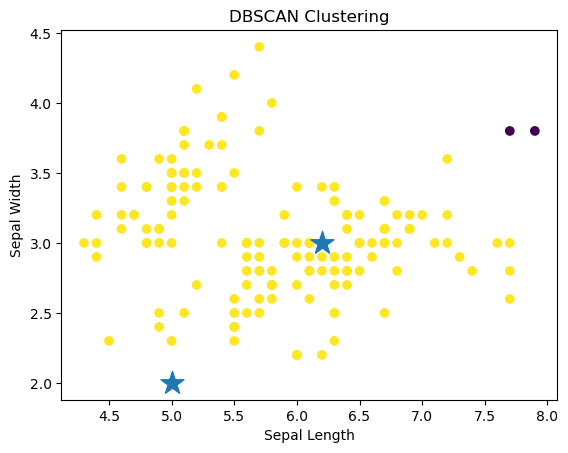

In [17]:
import numpy as np
Xnew = np.array([[5.0, 2.0], [6.2, 3.0]])  # Example points
predictions = kmeans_pp.predict(Xnew)
print('Cluster assignments:', predictions)


plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=db_labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering')
plt.scatter(Xnew[:,0],Xnew[:,1],marker='*',s=300)
plt.show()

**Comparing Random vs k-means++ Initialization**

- Random initialization: fast but may start with centroids in poor spots; possible for multiple centroids to land in the same cluster region.

- k-means++: spreads centroids across the data, greatly improving clustering and lowering inertia. This reduces the chance of poor results due to unlucky random choices.​

Best practice: Use k-means++ unless you have a specialized reason for using random.

**Key Points**

- Clustering is unsupervised—no labels, purely patterns in the data.
- Always plot your clusters to check the quality visually, especially with 2D data.
- Try multiple clustering methods: k-means is great for round-ish clusters, DBSCAN/Density methods for more complex shapes and noise.
- Use k-means++ for smarter initialization and more reliable results.
- The .predict() method with k-means lets you keep classifying new points as your dataset grows.

Sources:

[1](https://www.geeksforgeeks.org/machine-learning/k-means-clustering-on-the-handwritten-digits-data-using-scikit-learn-in-python/)
[2](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
[3](https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python)
[4](https://domino.ai/blog/getting-started-with-k-means-clustering-in-python)
[5](https://www.w3schools.com/python/python_ml_k-means.asp)
[6](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html)
[7](https://www.youtube.com/watch?v=hBHoEbZohI0)
[8](https://www.datacamp.com/tutorial/k-means-clustering-python)